<a href="https://colab.research.google.com/github/vishal36-pop/kaggle-csiro-competition/blob/main/notebook(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()
username = 'vishalreddyk'
token = 'db5da92f0750e29428cbc1a2ed8e2dfb'

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

csiro_biomass_path = kagglehub.competition_download('csiro-biomass')

print('Data source import complete.')


100%|██████████| 1.02G/1.02G [00:09<00:00, 118MB/s] 

Extracting files...


Data source import complete.


In [ ]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset,DataLoader
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
path = csiro_biomass_path
print(path)
os.listdir(path)

NameError: name 'csiro_biomass_path' is not defined

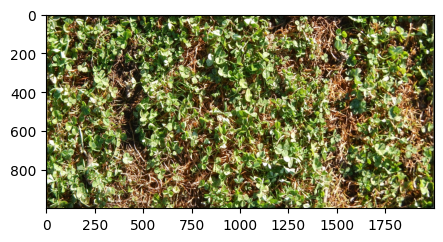

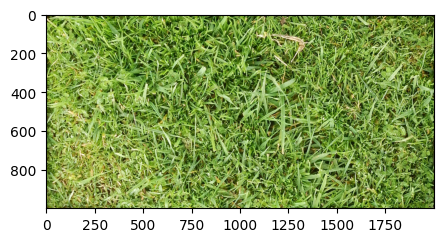

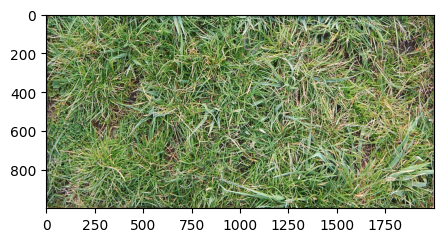

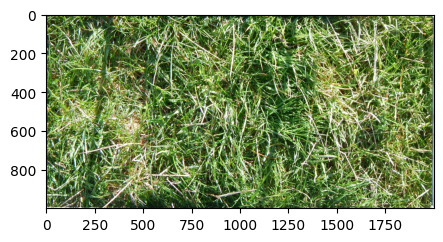

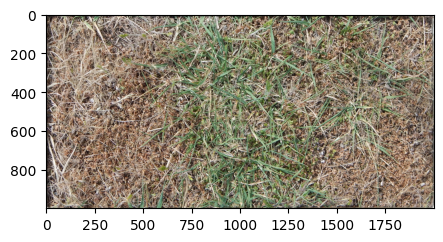

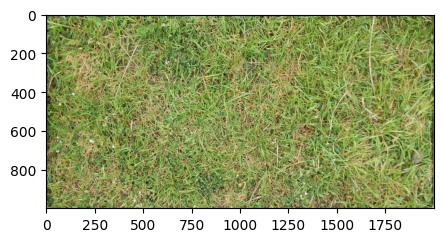

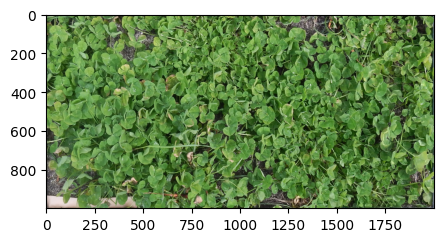

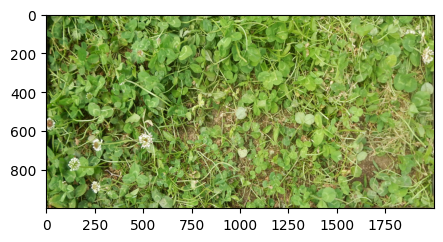

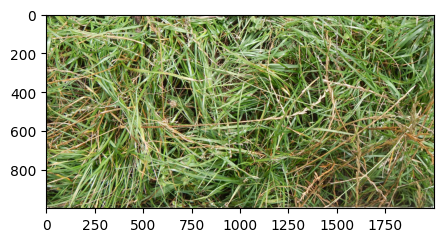

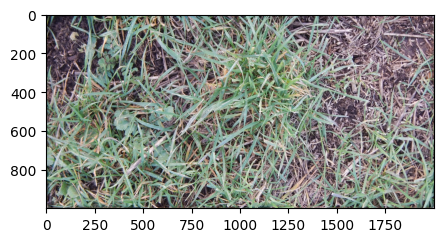

In [ ]:
from PIL import Image
#only upto 10 images
count = 0
for file in os.listdir(path+'/train'):
    with Image.open(path+'/train/'+file) as f:
        fig,ax = plt.subplots(figsize=(5,5))
        ax.imshow(f)
        count+=1
    if count == 10 :
        break

In [ ]:
import pandas as pd
data = pd.read_csv(path+'/train.csv')
data.head()

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750


In [ ]:

data['Sampling_Date'] = pd.to_datetime(data['Sampling_Date'], dayfirst=True, errors='coerce')
data['Day'] = data['Sampling_Date'].dt.day
data['Month'] = data['Sampling_Date'].dt.month
data['Year'] = data['Sampling_Date'].dt.year

data[['Sampling_Date', 'Day', 'Month', 'Year']].head()

,Sampling_Date,Day,Month,Year
0,2015-04-09,9.0,4.0,2015.0
1,2015-04-09,9.0,4.0,2015.0
2,2015-04-09,9.0,4.0,2015.0
3,2015-04-09,9.0,4.0,2015.0
4,2015-04-09,9.0,4.0,2015.0


In [ ]:
data.isna().sum(axis=0).sum()

np.int64(3980)

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
#drop the smapling date and the sample id 
data.drop(columns=['sample_id','Sampling_Date'],inplace=True)

In [ ]:
data.head()

,image_path,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target,Day,Month,Year
0,train/ID1011485656.jpg,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000,9.0,4.0,2015.0
1,train/ID1011485656.jpg,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984,9.0,4.0,2015.0
2,train/ID1011485656.jpg,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751,9.0,4.0,2015.0
3,train/ID1011485656.jpg,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735,9.0,4.0,2015.0
4,train/ID1011485656.jpg,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750,9.0,4.0,2015.0


In [ ]:
data['State'].unique()

array(['Tas', 'NSW', 'WA', 'Vic'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[['Species', 'target_name','State']])

# Convert to dataframe and concatenate
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Species', 'target_name','State']))
data = pd.concat([data.drop(columns=['Species', 'target_name','State']), encoded_df], axis=1)
data

,image_path,Pre_GSHH_NDVI,Height_Ave_cm,target,Day,Month,Year,Species_Clover,Species_Fescue,Species_Fescue_CrumbWeed,...,Species_WhiteClover,target_name_Dry_Clover_g,target_name_Dry_Dead_g,target_name_Dry_Green_g,target_name_Dry_Total_g,target_name_GDM_g,State_NSW,State_Tas,State_Vic,State_WA
0,train/ID1011485656.jpg,0.62,4.6667,0.0000,9.0,4.0,2015.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,train/ID1011485656.jpg,0.62,4.6667,31.9984,9.0,4.0,2015.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,train/ID1011485656.jpg,0.62,4.6667,16.2751,9.0,4.0,2015.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,train/ID1011485656.jpg,0.62,4.6667,48.2735,9.0,4.0,2015.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,train/ID1011485656.jpg,0.62,4.6667,16.2750,9.0,4.0,2015.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,train/ID983582017.jpg,0.64,9.0000,0.0000,9.0,1.0,2015.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1781,train/ID983582017.jpg,0.64,9.0000,0.0000,9.0,1.0,2015.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1782,train/ID983582017.jpg,0.64,9.0000,40.9400,9.0,1.0,2015.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1783,train/ID983582017.jpg,0.64,9.0000,40.9400,9.0,1.0,2015.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = data.drop(columns=['target'])
y = data['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= True,with_std=True)
X_standard = sc.fit_transform(X.iloc[:,1:])
print(X_standard.shape, X.shape)
data_without_images = pd.DataFrame(X_standard, columns=X.columns[1:])
X = pd.concat((X['image_path'],data_without_images),axis=1)

(1785, 29) (1785, 30)


In [ ]:
data_without_images.head()

,Pre_GSHH_NDVI,Height_Ave_cm,Day,Month,Year,Species_Clover,Species_Fescue,Species_Fescue_CrumbWeed,Species_Lucerne,Species_Mixed,...,Species_WhiteClover,target_name_Dry_Clover_g,target_name_Dry_Dead_g,target_name_Dry_Green_g,target_name_Dry_Total_g,target_name_GDM_g,State_NSW,State_Tas,State_Vic,State_WA
0,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,-0.075059,...,-0.16976,2.0,-0.5,-0.5,-0.5,-0.5,-0.515711,1.259745,-0.676123,-0.313786
1,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,-0.075059,...,-0.16976,-0.5,2.0,-0.5,-0.5,-0.5,-0.515711,1.259745,-0.676123,-0.313786
2,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,-0.075059,...,-0.16976,-0.5,-0.5,2.0,-0.5,-0.5,-0.515711,1.259745,-0.676123,-0.313786
3,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,-0.075059,...,-0.16976,-0.5,-0.5,-0.5,2.0,-0.5,-0.515711,1.259745,-0.676123,-0.313786
4,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,-0.075059,...,-0.16976,-0.5,-0.5,-0.5,-0.5,2.0,-0.515711,1.259745,-0.676123,-0.313786


In [ ]:
X.head()

,image_path,Pre_GSHH_NDVI,Height_Ave_cm,Day,Month,Year,Species_Clover,Species_Fescue,Species_Fescue_CrumbWeed,Species_Lucerne,...,Species_WhiteClover,target_name_Dry_Clover_g,target_name_Dry_Dead_g,target_name_Dry_Green_g,target_name_Dry_Total_g,target_name_GDM_g,State_NSW,State_Tas,State_Vic,State_WA
0,train/ID1011485656.jpg,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,...,-0.16976,2.0,-0.5,-0.5,-0.5,-0.5,-0.515711,1.259745,-0.676123,-0.313786
1,train/ID1011485656.jpg,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,...,-0.16976,-0.5,2.0,-0.5,-0.5,-0.5,-0.515711,1.259745,-0.676123,-0.313786
2,train/ID1011485656.jpg,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,...,-0.16976,-0.5,-0.5,2.0,-0.5,-0.5,-0.515711,1.259745,-0.676123,-0.313786
3,train/ID1011485656.jpg,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,...,-0.16976,-0.5,-0.5,-0.5,2.0,-0.5,-0.515711,1.259745,-0.676123,-0.313786
4,train/ID1011485656.jpg,-0.246319,-0.285204,0.293732,-0.393733,0.0,-0.360204,-0.29173,-0.16976,-0.256265,...,-0.16976,-0.5,-0.5,-0.5,-0.5,2.0,-0.515711,1.259745,-0.676123,-0.313786


In [ ]:
from torchvision import transforms
img_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.ColorJitter(0.2, 0.2, 0.15, 0.05),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomAdjustSharpness(1.3, p=0.15),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
class Csiro(Dataset):
    '''Data set for the training purpose'''
    def __init__(self,data_transforms = None):
        self.x = torch.FloatTensor(X.iloc[:,1:].to_numpy())
        self.image_list = X.iloc[:,0].to_numpy()
        self.y = torch.FloatTensor(y)
        self.data_transforms = data_transforms
    def __len__(self):
        return self.x.size()[0]
    def __getitem__(self,index):
        imgpth,x,y = path+'/'+self.image_list[index],self.x[index],self.y[index]
        if self.data_transforms:
            image = Image.open(imgpth)
            image = self.data_transforms(image)
        return image,x,y

In [ ]:
traindataset = Csiro(data_transforms=img_transforms)


In [ ]:
traindataset.image_list

array(['train/ID1011485656.jpg', 'train/ID1011485656.jpg',
       'train/ID1011485656.jpg', ..., 'train/ID983582017.jpg',
       'train/ID983582017.jpg', 'train/ID983582017.jpg'], dtype=object)

In [ ]:
train_data = DataLoader(traindataset,batch_size=128,shuffle= True)

In [ ]:
#check an item 
next(iter(train_data))

[tensor([[[[ 0.3994, -1.2788, -1.1932,  ..., -0.4568, -0.4739, -0.9363],
           [ 0.0741, -0.5253, -1.4158,  ..., -0.3541, -0.4397, -0.3369],
           [-1.1247, -0.5424, -0.6109,  ..., -0.9363, -0.9705, -0.7137],
           ...,
           [-1.6727, -1.2959, -0.8849,  ..., -1.1589, -1.8439, -1.8953],
           [-1.5357, -1.4672, -0.9877,  ..., -1.3644, -1.6384, -1.8953],
           [-0.9363, -0.9534, -0.8507,  ..., -1.3473, -1.3815, -1.6555]],
 
          [[ 0.5378, -1.0553, -0.9503,  ..., -0.1099, -0.1450, -0.6176],
           [ 0.2577, -0.2325, -1.1779,  ..., -0.0749, -0.1975, -0.1450],
           [-0.9503, -0.2150, -0.3550,  ..., -0.6352, -0.6877, -0.4776],
           ...,
           [-1.5805, -1.1954, -0.7927,  ..., -0.9678, -1.6331, -1.7031],
           [-1.4230, -1.3529, -0.8803,  ..., -1.0903, -1.4580, -1.6856],
           [-0.7402, -0.7927, -0.7402,  ..., -1.0378, -1.1779, -1.4755]],
 
          [[ 0.0431, -1.2816, -1.1073,  ..., -0.7761, -0.9853, -1.3339],
           [-

In [ ]:
from torchvision.models import resnet18
help(resnet18)

Help on function resnet18 in module torchvision.models.resnet:

resnet18(*, weights: Optional[torchvision.models.resnet.ResNet18_Weights] = None, progress: bool = True, **kwargs: Any) -> torchvision.models.resnet.ResNet
    ResNet-18 from `Deep Residual Learning for Image Recognition <https://arxiv.org/abs/1512.03385>`__.

    Args:
        weights (:class:`~torchvision.models.ResNet18_Weights`, optional): The
            pretrained weights to use. See
            :class:`~torchvision.models.ResNet18_Weights` below for
            more details, and possible values. By default, no pre-trained
            weights are used.
        progress (bool, optional): If True, displays a progress bar of the
            download to stderr. Default is True.
        **kwargs: parameters passed to the ``torchvision.models.resnet.ResNet``
            base class. Please refer to the `source code
            <https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py>`_
            for more 